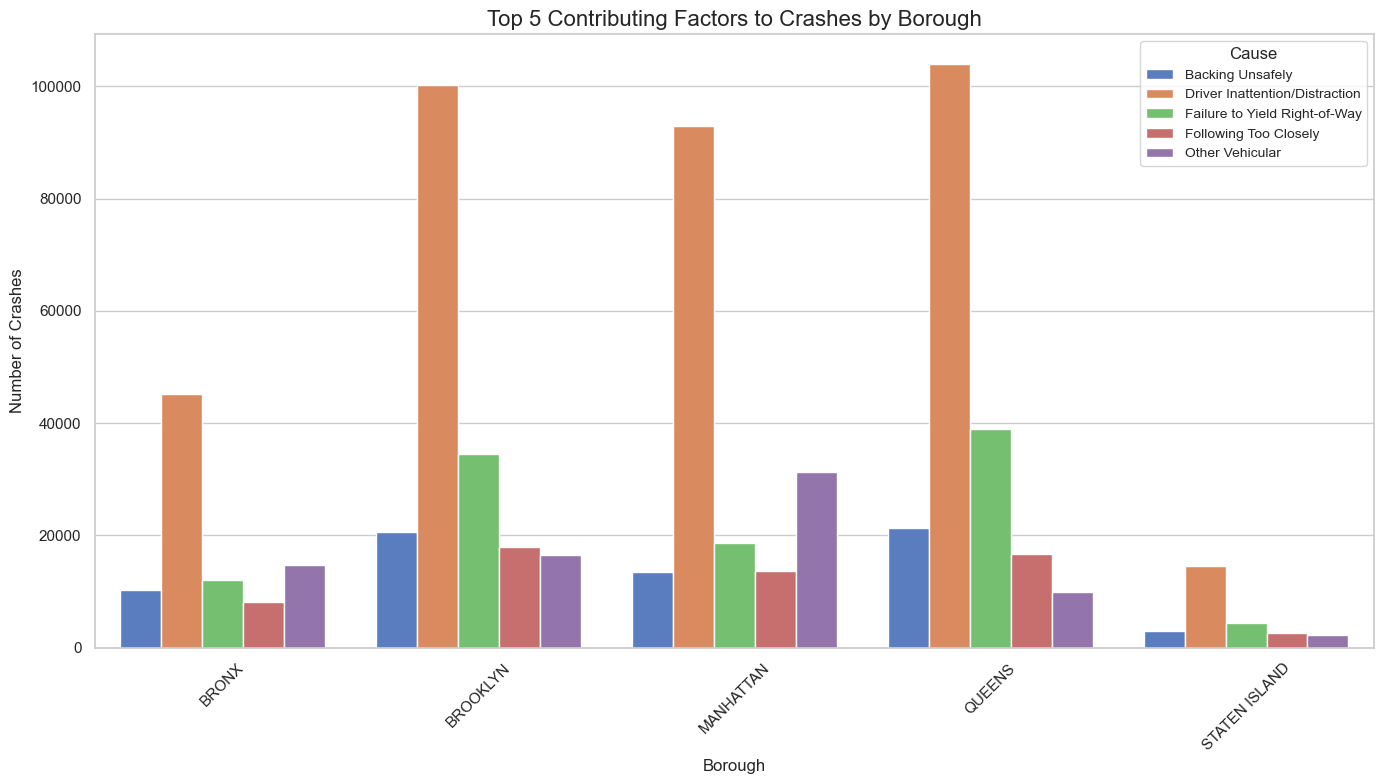

In [15]:
import pandas as pd


file_path = "/Users/bellahewardt/Desktop/Motor_Vehicle_Collisions_-_Crashes.csv"
df = pd.read_csv(file_path, low_memory=False)

relevant_columns = [col for col in df.columns if 'CONTRIBUTING FACTOR' in col or 'BOROUGH' in col]
df[relevant_columns].head()


crash_causes_df = df[['BOROUGH', 
                      'CONTRIBUTING FACTOR VEHICLE 1', 
                      'CONTRIBUTING FACTOR VEHICLE 2',
                      'CONTRIBUTING FACTOR VEHICLE 3',
                      'CONTRIBUTING FACTOR VEHICLE 4',
                      'CONTRIBUTING FACTOR VEHICLE 5']].copy()


crash_causes_df.dropna(subset=['BOROUGH'], inplace=True)


melted = crash_causes_df.melt(id_vars='BOROUGH', 
                              value_vars=[
                                  'CONTRIBUTING FACTOR VEHICLE 1', 
                                  'CONTRIBUTING FACTOR VEHICLE 2',
                                  'CONTRIBUTING FACTOR VEHICLE 3',
                                  'CONTRIBUTING FACTOR VEHICLE 4',
                                  'CONTRIBUTING FACTOR VEHICLE 5'],
                              var_name='VEHICLE', value_name='CAUSE')


melted = melted.dropna(subset=['CAUSE'])
melted = melted[melted['CAUSE'].str.upper() != 'UNSPECIFIED']


cause_by_borough = melted.groupby(['BOROUGH', 'CAUSE']).size().reset_index(name='COUNT')


import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


top_causes = (
    cause_by_borough.groupby("CAUSE")["COUNT"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)


filtered_data = cause_by_borough[cause_by_borough["CAUSE"].isin(top_causes)]


plt.figure(figsize=(14, 8))
sns.barplot(
    data=filtered_data,
    x="BOROUGH",
    y="COUNT",
    hue="CAUSE",
    palette="muted"
)

plt.title("Top 5 Contributing Factors to Crashes by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.legend(title="Cause", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()